In [2]:
# plotting libraries

# for inline plots in jupyter
if True:
    %matplotlib inline
else:
    %matplotlib notebook
    
    
# import matplotlib
import matplotlib.pyplot as plt

#import numpy
import numpy as np

#import scipy.stats
import scipy.stats

# import integrate
import scipy.integrate as integrate


# for latex equations
from IPython.display import Math, Latex

# for displaying images
from IPython.core.display import Image

import seaborn as sns


# Procedimientos generales:

## Método de la función inversa

**Proposición**

Supongamos que la v.a $X$ tiene una función de distribución $F$ continua y estrictamente creciente $0 < F(X) < 1$. Sea $U$ una v.a con distribución uniforme $\sim U (0, 1)$. Entonces la v.a. $F^{-1}(U)$ tiene función de distribución $F(X)$.

*Demostración:*

$$
F(X) = P ( F^{-1}(U) \leq x) = P (F ( F^{-1} (U) )  \leq  F(x)  ) = P(U \leq  F(x)) = P( X \leq x ) = F(X)
$$

donde la primera igualdad es cierta por la monotonía de $F$, la segunda porqué $F ( F^{-1} (U) ) = U$ y la última porqué $U$ tiene una distribución uniforme en $(0, 1)$.

\begin{remark}
Esta proposición implica que es posible obtener una muestrea de una v.a $X$ de la que se conoce su $F^{-1}$ generando una muestra uniforme en $(0, 1)$ y, después, evaluando la función inversa $X = F^{-1}(U)$ para cada valor de la muestra. 
\end{remark}


*Algoritmo:*

 * **for i in** $u_1, u_2, \cdots , u_n \sim \mathcal{U}(0,1)$  **:**
      * $x_i = F^{-1}(u_i)$


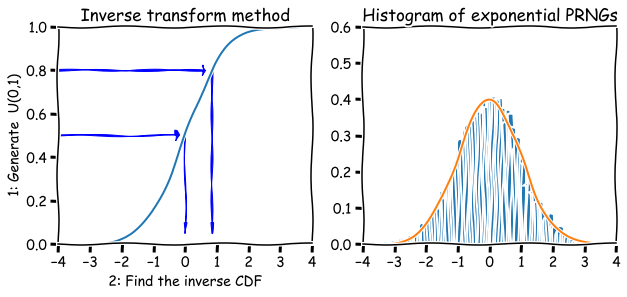

In [18]:

dist = scipy.stats.norm
dist_pdf = dist.pdf
dist_icdf = dist.ppf
dist_cdf = dist.cdf

x = np.linspace(-4,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(x, dist_cdf(x))
    plt.axis([-4, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(-4, q, 4 + dist_icdf(q)-0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(dist_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate  U(0,1)')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = dist_icdf(u)
    plt.hist(v, histtype='barstacked', bins=100, density=True, linewidth=2)
    plt.plot(x, dist_pdf(x), linewidth=2)
    plt.axis([-4,4,0,0.6])
    plt.title('Histogram of exponential PRNGs');

\begin{example}

Proporcione un algoritmo para generar una v.a de una distribución $X \sim E(\lambda)$

$$ F(x)=\begin{cases} 1 - e^{-\lambda x} & x \geqslant 0 \\ 0 &\text{otherwise}\end{cases}.$$

\end{example}


Solución:

\begin{align}
u_i & = 1 - e^{-\lambda x_{i}} \\
 e^{-\lambda x_{i}} & = 1 - u_i \\
 x_i & = \frac{- \ln (1- u_i) }{\lambda}  \\
 x_i & =   \frac{- \ln (u_i) }{\lambda}  
\end{align}

```python
def alg_expo_rvs (size, lambda_) :
    ''' Genera una muestra de una distribución exponencial'''
    u = scipy.stats.uniform.rvs (size=size)
    return (-np.log(u)/lambda_)

# Creating an arbitrary....
np.random.seed (123)
lambda_ = 1
n = 1000

x = alg_expo_rvs (size=n, lambda_=lambda_ )
```

Supongamos que generamos una muestra de una distribución $X\sim E(\lambda = 1)$ utilizando el programa anterior. En el panel dercho de la figura se ha representado los histogramas de la muestra y en linea continua la p.d.f de $E(1)$. Se observa una concordancia *visual" entre la distribución empírca, histogramas, y la teórica.

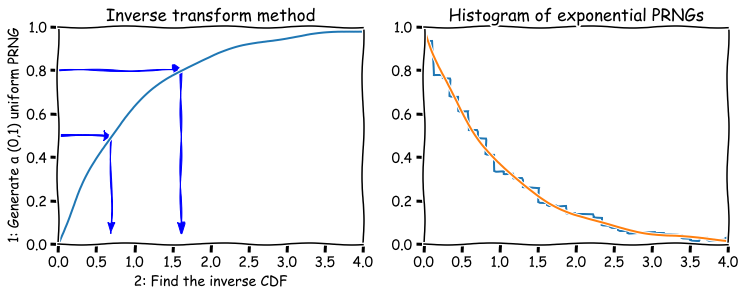

In [2]:

dist = scipy.stats.expon
expon_pdf = scipy.stats.expon.pdf
expon_icdf = scipy.stats.expon.ppf
expon_cdf = scipy.stats.expon.cdf

x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate a (0,1) uniform PRNG')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histogram of exponential PRNGs');

A continuación ejecutaremos el contraste de Kolmogorov-Smirnov (KS). En el apéndice repasamos brevemente el contraste KS: 
* Adoptamos como hipótesis nula $H_0$ que *la muestra generada con nuestro algoritmo es compatible con la distribución exponencial $E(1)$*. Como se supera el contraste con una confianza superior a $\alpha = 0.05$ aceptamos la hipótesis $H_0$. 
* Es interesante analizar los valores del estadístico $D$ y el $p-\text{value}$ cuando *contrastamos* la **muestra anterior** con otra distribución, por ejemplo la $E(0.7)$. Como observamos en el resultado de KS, la probabilidad de observar una "distancia máxima" entre las cdf de la distribución teórica (exponencial de $\lambda=0.7$) y una empírica sea igual o superior a $D_n = 0.1$ es muy muy pequeña, inferior a $10^{-9}$. En este segundo caso rechazaríamos la hipótesis $H_0$ y, por tanto, la muestra **no** sería compatible con distribución exponencial de parámetro $\lambda=0.7$. 

In [3]:
np.random.seed (123)

def alg_expo_rvs  (size, lambda_) :
    u = scipy.stats.uniform.rvs (size=size)
    return (-np.log(u)/lambda_)

# Creating an arbitrary....
np.random.seed (123)
lambda_ = 1
n = 1000

x = alg_expo_rvs (size=n, lambda_=lambda_ )

# test ks
# one side test OK
print (scipy.stats.kstest(x, scipy.stats.expon.cdf) )

# one side test Error
lambda2_ = 0.8
print ( scipy.stats.kstest(x, scipy.stats.expon.cdf, args=(0, 1/lambda2_)) )


KstestResult(statistic=0.025222960578770826, pvalue=0.5480194732823952)
KstestResult(statistic=0.10068661049072081, pvalue=2.806949636343616e-09)


**Funciones de distribución discretas**

La metodología del método de la función inversa es aplicable a distribuciones discretas.

\begin{exercise}
                                                                                            Sea una v.a $X \sim Bern(p )$ con c.d.f  
                                                                                            
                                                                                           
$$                                                                                          F(x) = \begin{cases} 0  & x < 0 \\  1-p  & 0 \geqslant x < 1 \\ 1 & x  \geqslant 1 \end{cases}
$$                                                                                                                 
*Solución:*

* **for i in** $u_1, u_2, \cdots , u_n \sim \mathcal{U}(0,1)$  **:**
     * **if** $u_i \leqslant 1-p$ **:** 
          * $x_i = 0$
     * **else :** 
          * $x_i = 1$

En la figura se representa la c.d.f de una v.a $X \sim Bern(p=0.3)$ 

\end{exercise}

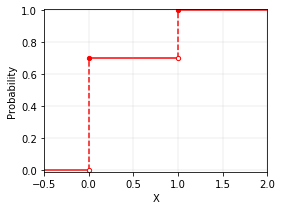

In [4]:
p = 0.3
data = [-0.5, 0, 1, 2]
y = np.array([ 1-p, 1.])
yn = np.insert(y, 0, 0)

fig, ax = plt.subplots(figsize=(4,3))
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=yn, xmin=data[:-1], xmax=data[1:],
          color='red', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=data[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
          linestyle='dashed', zorder=1)

ax.scatter(data[1:-1], y, color='red', s=18, zorder=2)
ax.scatter(data[1:-1], yn[:-1], color='white', s=18, zorder=2,
           edgecolor='red')
ax.grid(False)
ax.set_xlim(data[0], data[-1])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel ("X")
ax.set_ylabel ("Probability")
ax.grid(lw=0.2)


plt.show()

\begin{exercise}

Suponga la distribución discreta de soporte $ \{1, 2 ,3 ,4 ,5 \} $ y con función de distribución de masa
$\{0.07, 0.14, 0.21, 0.26, 0.32\}$ construya un algoritmo para generar una muestra.

Solución:

La función de distribución acumulada para la función de masa anterior se representa a continuación.

\end{exercise}


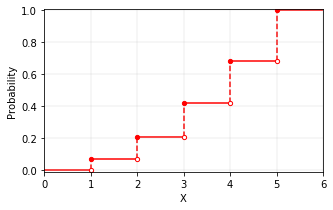

In [5]:
data = np.arange(0, 7)
y = np.array([.07, .21, .42, .68, 1.])
yn = np.insert(y, 0, 0)

fig, ax = plt.subplots(figsize=(5,3))
ax.set_facecolor('white')

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=yn, xmin=data[:-1], xmax=data[1:],
          color='red', zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=data[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
          linestyle='dashed', zorder=1)

ax.scatter(data[1:-1], y, color='red', s=18, zorder=2)
ax.scatter(data[1:-1], yn[:-1], color='white', s=18, zorder=2,
           edgecolor='red')
ax.grid(False)
ax.set_xlim(data[0], data[-1])
ax.set_ylim([-0.01, 1.01])
ax.set_xlabel ("X")
ax.set_ylabel ("Probability")
ax.grid(lw=0.2)


\begin{exercise}

Suponga una v.a $X$ cuya función densidad de probabilidad (p.d.f) es
$$
f(x) = \frac{1}{2} e^{- |x|}
$$
Construya un algoritmo para extraer una muestra. 

Solución:

La función de densidad anterior se puede considerar como la composición de dos dstribuciones exponeciales $E(1)$.

El algoritmo debe seleccionar una muestra $x_i$ de una distribución $X \sim E(1)$ y después, aplicando el método de la función inversa para una distribución de Bernuolli devolvera $x_i$ o $-x_i$ con probabilidad $p=0.5$. 

\end{exercise}

El ejercicio anterior es un ejemplo del **método de composición** donde una función densidad de probabilidad es una combinación lineal de funciones de densidad de probabilidad
$$
f(x) = \sum_{i=1}^n p_i g(x | y = i) = \sum_{i=1}^n p_i g_i(x)
$$
con $p_i = P(Y = i) > 0$ , $i=0,\cdots, n$, $\sum_i p_i = 1$, y $g_i$ son funciones de densidad.

\begin{exercise}

Suponga un sistema de colas al que se incorporan clientes de dos tipos. Los clientes del tipo I son 3 veces mas numerosos que los clientes del tipo II. Los tiempos entre clientes  se modelizan por $E(\lambda = 1)$ y $E(\lambda=0.7)$ para los del tipo I y tipo II respectivamente. Construya un algoritmo que genere los tiempos entre clientes que se incorporan al sistema.

\end{exercise}

## Método de aceptación-rechazo

Para el método de inversión es necesario conocer la función de distribución de la variable aleatoria. En ocasiones, conocemos la función de de densidad de probabilidad (p.d.f) pero no la función de distribución, como ocurre, por ejemplo, con la distribución normal. O puede ser muy poco eficiente invertir la función de distribución. En algunos de estos casos podemos aplicar el método de aceptación y rechazo, introducido por Von Neumann (1951).

Supongamos que deseamos obtener una muestra de una v.a. $X$ con p.d.f $f(x)$. No lo sabemos hacer directamente, pero disponemos de un procedimiento para muestrear de una función de densidad $g(x)$ tal que $f(x) \leqslant c g(x)$ para todo $x$ siendo $c$ una cota superior tal que $c < \infty$. Y donde el dominio de $g(x)$ es el mismo que $f(x)$.

Primero veremos el caso mas sencillo: cuando la función $g(x)$ es una distribución uniforme. Daremos dos versiones de este algoritmo. Después mostramos el caso general. 


**Algoritmo de aceptación rechazo con** $g(x) \sim U(0,c)$ **(versión 1)** 

1. Generar  una muestra $\{ x_0, x_1, \cdots, x_n \}$  de $X \sim U (a, b)$

    * Para cada $x_i$ generar un valor  $u_i$  de una distribución $U \sim U(0,c)$
    * Si $u_i \leq f(x_i)$ se acepta $x_i$ como una muestra de la distribución $f(x)$

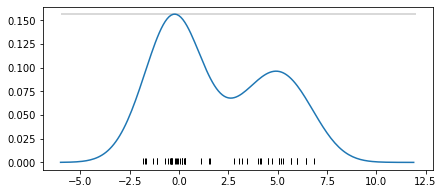

In [23]:
sample = np.hstack((np.random.randn(30), np.random.randn(20)+5))
density = scipy.stats.kde.gaussian_kde(sample)


fig, ax = plt.subplots(figsize=(7,3))

x = np.arange(-6,12,0.1)
c = max(density(x) )
ax.plot(x, density(x))
ax.hlines(c, -6, 12, alpha=0.2)

ax.plot(sample, [0.001]*len(sample), '|', color='k')
plt.show()

**Algoritmo de aceptación rechazo,** $g(x) \sim U(0,1)$  **(versión 2)** 

1. Generar una muestra  $\{ x_0, x_1, \cdots, x_n \}$  de $X \sim U (a, b)$

    * Para cada $x_i$ generar un valor $u_i$  de una distribución $U \sim U(0,1)$
    * Si $u_i \leq \frac{f(x_i)}{c}$ se acepta $x_i$ como una muestra de la distribución $f(x)$

**Algoritmo de aceptación y rechazo**

1. Generar una muestra  $\{ x_0, x_1, \cdots, x_n \}$  de $X \sim G(X)$

    * Para cada $x_i$ generar un valor $u_i$  de una distribución $U \sim U(0,1)$
    * Si $u_i \leq \frac{f(x_i)}{c g(x)}$ se acepta $x_i$ como una muestra de la distribución $f(x)$

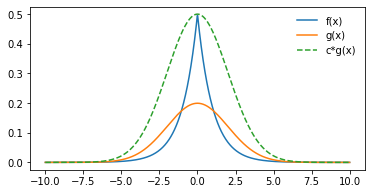

In [7]:

f = lambda x :  1./2. * np.exp(- np.abs(x))
g = scipy.stats.norm 


n = 50000
sigma2 = 4

c = np.sqrt( 2* np.pi * sigma2) / 2

# Plot 
fig, ax=plt.subplots(1, figsize=(6,3))
x = np.linspace (-10, 10 , 1000)

ax.plot(x, f(x), label='f(x)')
ax.plot(x,    g.pdf(x, scale=np.sqrt(sigma2)) , label='g(x)')
ax.plot(x, c* g.pdf(x, scale=np.sqrt(sigma2)), '--', label='c*g(x)' )

ax.legend(loc='best', frameon=False)

plt.show()

En [Sigman 2007] se incluye una demsotración del algoritmo


\begin{example}

Proporcione un algoritmo para generar una muestra de la distribución $Z \sim N(0,1)$ utilizando como generador $g(x)$ la distribución exponecial $X \sim E(\lambda=1)$

\end{example}

*Solución*:

* Al ser la distribución $Z \sim N(0,1)$ simétrica respecto a z=0, podemos generar únicamente valores positivos, posteriormente eligiremos el signo de la muestra con probabilidad 1/2.

* Para poder aplicar el método de aceptación y rechazo debemos hallar el valor de la constante $c$ tal que $f(x) \leqslant c g(x)$ para todo $x$, siendo $f(x) \sim N(x | x \geq 0)$ y $g(x) \sim E(1)$.

    Definamos $c(x) := f(x) / g(x)$ de forma que el valor $c$ búscado sea $c = \max_{x} c(x)$. Teniendo en cuenta que para $x \geq 0$,  $f(x) =  \frac{2}{\sqrt{2 \pi} } e^{- \frac{x^2}{2} } $ y $g(x) = e^{-x}$, la función $c(x) = e^{x -\frac{x^2}{2}}  \sqrt{ \frac{2}{\pi} }$ tendrá un máximo en $x =1$ (para encontrar el máximo debemos resolver $c'(x) = 0$). Por tanto $c = \sqrt{ \frac{2 e}{\pi} }$ y $\frac{f(x)}{c  g(x)} = e^{-(x-1)^2/2}$

    *Algoritmo (versión 1):*
    1. Generar una muestra $X$ de la distribución exponecial $E(\lambda = 1)$. Esto es, $x_1 = -\log (u_1)$, con $u_1 \sim U(0,1)$
    2. Generar  $u_2 \sim U(0,1)$
    3. Si $u_2 \leqslant  e^{-(x_1-1)^2/2}$  aceptar $X$, sino volver al paso 1.
    4. Generar  $u_3 \sim U(0,1)$. Si  $u_3 \leqslant 0.5$ devolver $z = x_1$ sino devolver $z = -x_1$
    
    Notar que en el paso 3, es equivalente a $\log u_2 \geqslant (x-1)^2 / 2$, por tanto el algoritmo podemos re-escribirlo mas eficientemente
    
  *Algoritmo (versión 2):*
   1. Generar una muestra de tamaño dos de la distribución exponecial $E(\lambda = 1)$. Esto es, $x_1 = -\log (u_1)$ y $x_2 = -\log (u_2)$  con $u_1, u_2 \sim U(0,1)$
   2. Si $x_2 \geqslant  (x_1-1)^2/2$  aceptar $x_1$, sino volver al paso 1.
   3. Generar  $u_3 \sim U(0,1)$. Si  $u_3 \leqslant 0.5$ devolver $z = x_1$ sino devolver $z = -x_1$
   
¿Sería posible utilizando una exponencial con $\lambda \neq 1$ obtener un menor número de rechazos? Al ser la probabilidad de rechazar un valor $p =1/c$ este pregunta es equivalente a preguntarnos si para $\lambda=1$ se obtiene el mínimo valor de $c$. Se demuestra fácilmente que así ocurre.  

\begin{exercise}
Proporcione un algoritmo para generar una muestra de una distribución Beta de parámetros $\alpha=3$ y $\beta=4$.
Su función de densidad es 
$$
f(x) = 60 x^2 (1-x)^3, \, \, \, \, 0 < x < 1
$$
Utilice como función $g(x) \sim U(0,1)$. ¿Cúal es la eficiencia del generador, esto es, la probabilidad del proceso de Bernuolli?
\end{exercise}


x maximum= 0.4000
c = 2.0736
Efficiency 0.515


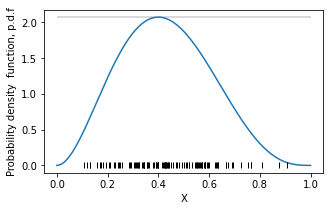

In [5]:
import scipy.optimize as opt

def acpt_rechazo (f, g, c, x ) :
    n = len(x)
    u = scipy.stats.uniform.rvs(size = n)
    #print(u)
    return x[u  < f(x) / (c * g(x)) ]

np.random.seed(123)
n = 200
a, b = 0, 1

f = lambda x:  60*(x**2)*(1-x)**3  
f_minus = lambda x:  -60*(x**2)*(1-x)**3  

x = np.linspace(a, b, n)
c = max(f(x))

# get the maximum
res = opt.minimize_scalar(f_minus, bounds=(a, b), method='bounded')
print(f'x maximum= {res.x:.4f}')
c = f(res.x)
print(f'c = {c:.4f}')

g = lambda x : 1/(b-a)
 
sample_g = scipy.stats.uniform.rvs (scale = (b-a), size =n )

x_ok = acpt_rechazo (f, g, c, sample_g)
#print(x_ok)
print (f'Efficiency {len(x_ok) / n}')

#--KS Test
sample_beta = scipy.stats.beta.rvs( a=3, b=4, size = 50000)
scipy.stats.kstest(x_ok,  scipy.stats.beta.cdf, args=(3, 4) )


#-----plot
fig, ax = plt.subplots(1, figsize=(5, 3))
x = np.linspace(a, b, n)
ax.plot (x, f(x))
ax.plot(x_ok, [0.01]*len(x_ok), '|', color='k')
ax.hlines(c, a, b, alpha=0.2)
ax.set_xlabel ("X")
ax.set_ylabel ("Probability density  function, p.d.f")
plt.show()

\begin{exercise}
Proporcione un algoritmo para generar una muestra de una distribución $N(0,1)$. Utilice como función densidad de probabilidad la distribución de Cauchy de parámetros $m=0$ y $b =1$
$$
f(x) = \frac{1}{\pi} \frac{b}{(x-m)^2 + b^2}
$$
\end{exercise}

x maximum= 1.0000
c = 1.5203
p = 0.659
KstestResult(statistic=0.011926098691272258, pvalue=0.30572010330339705)


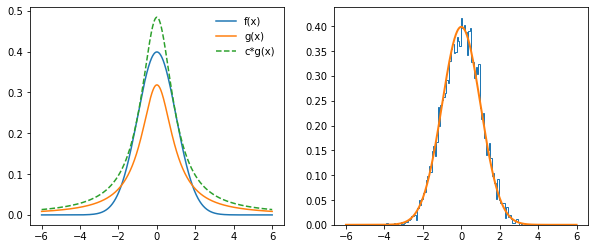

In [7]:
import scipy.optimize as opt
np.random.seed(123)

def acpt_rechazo (f, g, c, x ) :
    n = len(x)
    u = scipy.stats.uniform.rvs(size = n)
    return x[u  < f(x) / (c * g(x)) ]

f = scipy.stats.norm.pdf
g = scipy.stats.cauchy

h_minus = lambda x : -(f(x) * np.pi * (x*x + 1))
n = 10000

# get the maximum
res = opt.minimize_scalar(h_minus, bounds=(0, 2), method='bounded')
c = f(res.x)/g.pdf(res.x)

sample = g.rvs(size=n)
x_ok =   acpt_rechazo (f, g.pdf, c, sample )   

print(f'x maximum= {res.x:.4f}')
print(f'c = {c:.4f}')
print(f'p = {len(x_ok)/n}')

# contraste
print(scipy.stats.kstest(x_ok,  scipy.stats.norm.cdf))

# ----plot
fig, ax=plt.subplots(1,2, figsize=(10, 4))

x = np.linspace (-6, 6 , 1000)
ax[0].plot(x, f(x), label='f(x)')
ax[0].plot(x, g.pdf(x), label='g(x)')
ax[0].plot(x, c* g.pdf(x), '--', label='c*g(x)' )
ax[0].legend(loc='best', frameon=False)

ax[1].hist(x_ok, histtype='step', bins=100, density=True, linewidth=1, label='Sample')
ax[1].plot(x, f(x), linewidth=2)
plt.show()



### Aceptación y rechazo frente a muestreo aleatorio

\begin{equation}
\mu =  E \left[ h(x) \right] = \int_{\Omega} h(x) \, f(x) \, dx
\label{y1}
\end{equation}

\begin{exercise}
Repetir el ejercicio 8 del tema "Integración de MC" pero ahora estime $\mu$ utilizando:
   1. Una muestra de $f(x)$ obtenida con el método de la función inversa
   2. Una muestra de $f(x)$obtenida con el método de aceptación / rechazo
   3. Compare la varainaza del estimador obtenido con aceptación / rechazo frente a la varianza del estimador obtenido con *muestreo con importancia* cuando se utiliza un mismo tamaño de muestra. ¿Esperas obtener diferentes valores? Razona tu respuesta.
\end{exercise}


# Métodos específicos para distribuciones univariantes continuas

## Distribución normal
### Suma de doce uniformes

Este procedimiento se basa  en el teorema central del limite y y puede verse como un ejemplo de transformación. Si las variables $U_i, i =1, \cdots, n$ son i.i.d $U(0,1)$, con lo que $E[U_i] = 1/2$ y $\text{Var}[U_i] = 1/12$

$$
X = \frac{ \sum_{i=1}^n U_i - \frac{n}{2} }{\sqrt{n /12}}
$$
se distribuye aproximadamente como una normal para $n$ suficientemente grande. Una buena aproximación se obtiene ya para $n=12$ 

1. Generar  $\{ u_1, \cdots,  u_{12} \}  \sim \mathcal{U}(0,1)$ 
2. Devolver $X = \sum_{i=1}^{12} U_i - 6$ 

### Método de Box-Muller
Supongamos que $X$ e $Y$ son dos v.a independientes tal que $X \sim N(0,1)$ e $Y\sim N(0,1)$. La función de densidad de probabilidad conjunta $(X,Y)$ será
$$
f(x,y) = f(x) \cdot f(y) = \frac{1}{\sqrt{2 \pi}} e^{-x^2} \cdot  \frac{1}{\sqrt{2 \pi}} e^{-y^2} = \frac{1}{2 \pi} e^{-(x^2 + y ^2)/2}
$$
Sean $R$ y $\Theta$ las coordenadas polares de $X$ e $Y$, esto es, 

\begin{align}
R^2 & = X^2 + Y^2  \\
 \tan{ \theta } & = \frac{Y}{X} 
\end{align}

Al ser $X$ e $Y$ v.a también lo serán $R$ y $\Theta$. Si fuésemos capaces de generar las muestras $\{r_0, r_1, \cdots, r_n\} \in R$ y $\{ \theta_0, \theta_1, \cdots, \theta_n \} \in \Theta$ podríamos generar una muestra de $X$ (y otra de de $Y$) a través de las expresiones 

\begin{align}
x_i & = r_i \cos \theta_i  \\
y_i & = r_i \sin \theta_i  \\
\end{align}

La función de densidad de $(R, \theta)$, $g(R, \theta)$,  se puede obtener a partir de $f(X, Y)$

$$
g(R, \theta)=  f(R, \theta) \cdot \left| \frac{\partial(X, Y)}{\partial(R, \theta)} \right|
$$ 

Teniendo en cuenta que el jacobiano  $\left| \frac{\partial(X, Y)}{\partial(R, \theta)} \right| = R $
$$
g(R, \theta) = \frac{1}{2 \pi} R \, e^{- \frac{R^2}{2} } = g_1 \left( \theta \right) \, g_2 (R)
$$ 
siendo 
\begin{align}
g_1(R) &= \frac{1}{2\pi} \\
g_1(R) &= R e^{-R^2/2} \\
\end{align}
 $\theta$ sigue una distribución uniforme $U(0, 2 \pi)$ y una muestra de la distribución $R$ se puede generar por el método de la función inversa. Para ello debemos invertir su función de distribución. La función de distribución $F(R)$  
$$
F(R) =  \int_0^R  g(r) \,  dr =  \int_0^R r e^{- \frac{r^2}{2} } \, dr
= 1 - e^{{\frac{-R^2}{2} }}
$$

Si $U \sim U(0, 1)$ podemos hacer  $r_i = \sqrt{- 2 \log u_i }$


* **Generar** $u_1, u_2  \sim \mathcal{U}(0,1)$  **:**
* **Hacer :** 
     * $r = \sqrt{- 2 \log u_i }$ 
     * $\theta  = 2 \pi u_2 $
* **Hacer :** 
     * $x =  r \cos \theta$
     * $y =  r \sin \theta$



# Apéndice

## Distribución $F(X)$ de una muestra dada


\begin{remark}
*Distribución de las probabilidades*

Supongamos que tenemos una v.a $X$ de la que conocemos su función de distribución acumulada  $x \sim F(x)$. Extraigamos una muestra $\{x_0, x_1, \cdots , x_n \}$ y  evaluemos la función $F(X)$ para cada uno de los valores de la muestra. De esta forma obtenemos el conjunto de valores $\{ F(x_0), F(x_1), \cdots, F(x_n) \}$ ¿Que función de disribución empírica podríamos inferir a partir de esta última muestra? 

\end{remark}



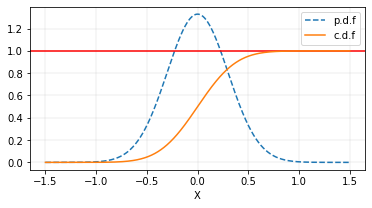

In [8]:
#----------------------
plt.figure( figsize=(6,3))

mu = 0
scale = 0.3
x = np.linspace(-1.5, 1.5, 1000)
max = scipy.stats.norm.pdf(mu, loc=mu,  scale=scale)

y0 =  scipy.stats.norm.pdf(x, loc=mu,  scale=scale)
y1 = scipy.stats.norm.cdf(x, loc=mu,  scale=scale)

plt.plot (x, y0, linestyle='--', label="p.d.f")
plt.axhline(y=1, xmin=-1.5, xmax=1.5, color='red') 
plt.plot(x, y1, label="c.d.f")
plt.legend(loc='best')
plt.grid(lw=0.2)
plt.xlabel("X")

plt.show()

\begin{remark} *Contraste visual*

Supongamos que tenemos una muestra $\{x_0, x_1,, \cdots , x_n \}$ de una v.a $X$ de la que desconocemos la distribución de la que proviene. Sin embargo, sospechamos que la muestra pertenece o bien a la distribución $F_1(X) \sim E(\lambda = 1)$ o bien a $ F_2(X) \sim E(\lambda = 0.85)$.
En la siguiente figura se ha evaluado $F_1(X)$ y $F_2(x)$. Discute los resultados.

\end{remark}

**Solución**

En la siguiente gráfica:
1. Supongamos que tenemos una muestra $x = \{ x_0, x_1, \ldots, x_n\}$ de la que desconocemos de que distribución provienen.
1. Vamos *a contrastar (testear)* si los datos son compatibles con dos determinadas distribuciones teóricas $F_1(x)$ y $F_2(x)$. En este caso $F_1(x)$ es la distribución exponencial de parámetro $\lambda=1$  y $F_2(x)$ la distribución exponencial de parámetro $\lambda=0.85$.
1. Recordad (tema 1)que la cdf de la distribución exponencial de parámetro $\lambda$ es $F(x) = 1 -\exp^{- \lambda x}$.  
1. Evaluamos $F_1(x)$ y $F_2(x)$ en cada uno de los puntos de la muestra. Obtenemos así los conjuntos de valores  $y = \{y_0, y_1, \ldots y_n\}$  siendo  $y_i = F(x_1)$ $y' = \{y_0', y_1', \ldots y_n'\}$  tal que $y_i' = F_2(x_i)$. 
1. Si la muestra $x$ es compatible con la distribución teórica $F_1(x)$, entonces la distribución empírica inferida a partir de $y$ debe ser compatible con una distribución $U(0,1)$. Esto es lo que observamos en la curva azul, el histograma azul **se asemeja** a la distribución uniforme. Sin embargo la muestra $x$ **no** no es compatible con la distribución teórica $F_2(x)$. La distribución empírica inferida a partir de la muestra $y'$ no parece compatible con la distribución uniforme $U(0,1)$ tal y como se observa en los histogramas naranjas. 

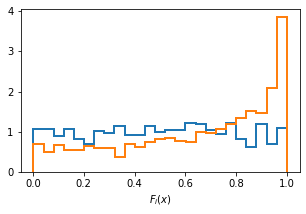

In [11]:
np.random.seed(123)

def alg_expo_rvs  (size, lambda_) :
    u = scipy.stats.uniform.rvs (size=size)
    return (-np.log(u)/lambda_)

F = lambda x, lambda_ : (1-np.exp (-lambda_ * x))

size = 1000

lambda_ = 0.5
f = scipy.stats.expon
args = {"scale" : 1/lambda_}

my_sample = alg_expo_rvs (size=size, lambda_=lambda_) 

# ----plot
fig, ax = plt.subplots(1, figsize=(5, 3))

y = F(my_sample, lambda_)
label = r'$\lambda=$' 
ax.hist(y, histtype='step', bins=25, density=True, linewidth=2, label=f'{label} {lambda_}')

lambda2_= 0.9
y2 = F(my_sample, lambda2_)
ax.hist(y2, histtype='step', bins=25, density=True, linewidth=2, label=f'{label} {lambda2_}')

ax.set_xlabel (r'$F_i(x)$' )
#ax.legend(loc='best', frameon=False)
plt.show()

## Contraste de Kolmogorov-Smirnov


Supongamos que tengamos una muestra de tamaño $n$ perteneciente a una determinada distribución que desconocemos. Queremos contrastar (*testear*) si la muestra es compatible con una distribución concreta. En otras palabras, queremos contrastar la hipótesis $H_0$ *la muestra es compatible con una determinada distribución teórica*. Por ejemplo, tenemos una muestra de los tiempos de servicio de un servidor en un sistema m/m/1 y queremos contrastar si la muestra es compatible con una distribución $E(\lambda = 1)$. Podríamos representar la función de distribución teórica (*la utilizada en el contraste*) frente a la función de distribución empírica (e.c.d.f), esto es, la distribución que inferimos a partir de los datos de la muestra.
Si la muestra fuese compatible con la distribución del contraste, ambas curvas deberían estar *visualmente muy próximas* . En el panel izquierdo de la figura se han representado ambas figuras.  ¿Cómo de próximas están? Podemos calcular la distancia máxima entre ambas curvas

$$
D_n = \sup_x \{|F_n(x) - F(x)| \}
$$

Pero, ¿Cómo evaluar si $D_n$ es una distancia grande o pequeña?. Para ello utilizamos el contraste de KS. 

**Como se elabora el contraste de KS**

El contraste de KS se basa en estimar la distancia máxima entre una muestra de tamaño $n$ extraída de una distribución $ \mathcal{U}(0,1)$ y la propia distribución $\mathcal{U}(0,1)$. Esta *distancia máxima* es una variable aleatoria (si se eligiese otra muestra  de $ \mathcal{U}(0,1)$ obtendríamos otro valor de la distancia máxima. Si repitiésemos el proceso con muchas muestras iid del mismo tamaño $n$ podríamos inferir la distribución empírica de $D$. Su p.d.f se muestra en el panel derecho de la siguiente figura (curva roja).

**Ejecución del contraste de KS**

Es contra esta distribución (la curva roja) con la que se compara el $D_n$ obtenido en la ecuación (19) cuando ejecutamos un test de KS para aprobar o rechazar una hipótesis $H_0$. *Recuerda que en el eje y del panel izquierdo de la gráfica tenemos probabilidades. Tal y como hemos visto en una sección anterior, $F(x_i)$ se debe distribuir uniformemente cuando se acepta la hipótesis $H_0$. En ese caso, la diferencia $D_n$ observada, ecuación 19,  debería ser equivalente (del mismo orden) que la distancia con la que se ha elaborado el contraste de KS, (que se ha elaborado utilizando distribuciones uniformes)*  

Cuando la muestra sea compatible con la distribución el valor obtenido $D_n \sim 0$ será *pequeño* (estará situado muy a la izquierda en la curva roja) y por tanto el área *a su derecha* será muy grande. Este área debemos interpretarla como la probabilidad de obtener una distancia entre dos muestras extraídas de una distribución $ \mathcal{U}(0,1)$  mayor o igual a $D_n$.  Sin embargo, en caso contrario, la muestra no es compatible con la hipótesis $H_0$, $D_n$ se situaría muy a la derecha en la curva roja y el área que queda a su derecha (i.e la probabilidad de encontrar un valor tan grande como $D_n$) sería próxima a cero. El área es lo que se denomina el $p$*-value*.

Como toda v.a el estadístico $D_n$ también tiene una función de distribución $F(D)$. A partir de ella podemos construir la función 1-F(D) 

KstestResult(statistic=0.04205674690843286, pvalue=8.663419084122704e-16)


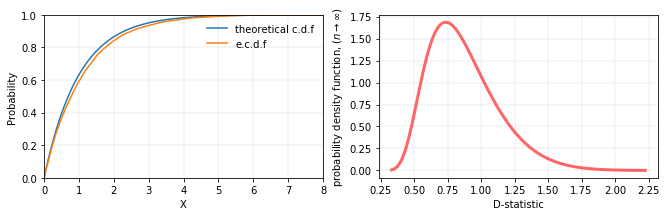

In [13]:
from scipy.stats import kstwobign

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)


# --- main program, Kolmogorov-Smirnov test (Failure)
np.random.seed (123)
lam = 0.9
n = 10000

x = scipy.stats.expon.rvs(size = n, scale = 1/lam)

print ( scipy.stats.kstest(x, scipy.stats.expon.cdf) )

# empirical cumulative distribution
x_e, y_e = ecdf(x)

# ----plot
fig, ax = plt.subplots(1, 2,  figsize=(11, 3))
ax[0].axis([0, 8, 0, 1])
ax[0].plot (x_e, scipy.stats.expon.cdf(x_e ), label="theoretical c.d.f" )
ax[0].plot (x_e, y_e, label="e.c.d.f")
ax[0].set_xlabel ("X")
ax[0].set_ylabel ("Probability")
ax[0].legend(loc='best', frameon=False)
ax[0].grid(lw=0.2)

x = np.linspace(kstwobign.ppf(0.0001),
                kstwobign.ppf(0.9999), 100)
ax[1].plot(x, kstwobign.pdf(x), 'r-', lw=3, alpha=0.6, label='kstwobign pdf')
ax[1].set_xlabel("D-statistic")
ax[1].set_ylabel(r'probability density function, $(n \rightarrow \infty$)')
ax[1].grid(lw=0.2)

#print( kstwobign.ppf( np.sqrt(n)* ) )


plt.show()

En la figura anterior para obtener la función de **distribución acumulada empírica (e.c.d.f)** se ha utilizado la siguiente función
```python

def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / float(n)
    return(x,y)
```

\begin{remark}
*Distribución de $p$-value*

Supongo que obtiene  $N$ muestras independientes, cada una de tamaño $n$, de una distribución, por ejemplo $X \sim N(0,1)$. A cada una de ellas se le pasa el contraste de Kolmogorov-Smirnov utilizando como $H_0$ la distribución de la que fueron generadas la muestra, en este caso la $N(0,1)$ ¿Cúal será la distribución empírica de los $N$ p-values obtenidos? Justifique la respuesta.
\end{remark}

```python
np.random.seed(123)

N = 5000
n = 1000

f =  scipy.stats.norm
sample = f.rvs (size = N * n).reshape ((N, n))

# Lista con todos los p-values
a = [scipy.stats.kstest(i, f.cdf)[1] for i in sample]

#plot
fig, ax = plt.subplots(1, figsize=(5, 4))   
ax.hist(a, histtype='step', bins=25, density=True, linewidth=2)
ax.set_xlabel("p-value")
ax.set_ylabel("Density")
ax.set_tile (f'{N} indpendent simulations')
plt.show()
```

**Referencias**

K. Sigman, Acceptance-Rejection Method (2007)
http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf